In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [2]:
# Load the dataset

df = pd.read_excel("C:/Users/Sai Kumar/Downloads/SodaSales.xlsx")
df["Month"] = pd.to_datetime(df["Month"], dayfirst=True)

In [3]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Month         45 non-null     datetime64[ns]
 1   SalesVol      45 non-null     int64         
 2   TVGrP         45 non-null     float64       
 3   InstoreAds    45 non-null     int64         
 4   OutdoorAds    45 non-null     float64       
 5   Promotion     45 non-null     int64         
 6   DigitalAds    45 non-null     int64         
 7   Price         45 non-null     int64         
 8   Comp1TV       45 non-null     int64         
 9   Comp1NPapers  45 non-null     int64         
 10  Comp1OOH      45 non-null     int64         
 11  Comp2NP       45 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(9)
memory usage: 4.3 KB
None
       Month  SalesVol       TVGrP  InstoreAds  OutdoorAds  Promotion  \
0 2012-01-01      6861  252.216327           0   3

In [4]:
# Convert column names for consistency

df.columns = df.columns.str.strip().str.replace(' ', '_')

In [5]:
# Set Month as datetime index

df['Month'] = pd.to_datetime(df['Month'], format="%d-%m-%Y")
df.set_index('Month', inplace=True)

#  <font color="red">1. Seasonality & Trend Detection</font>.

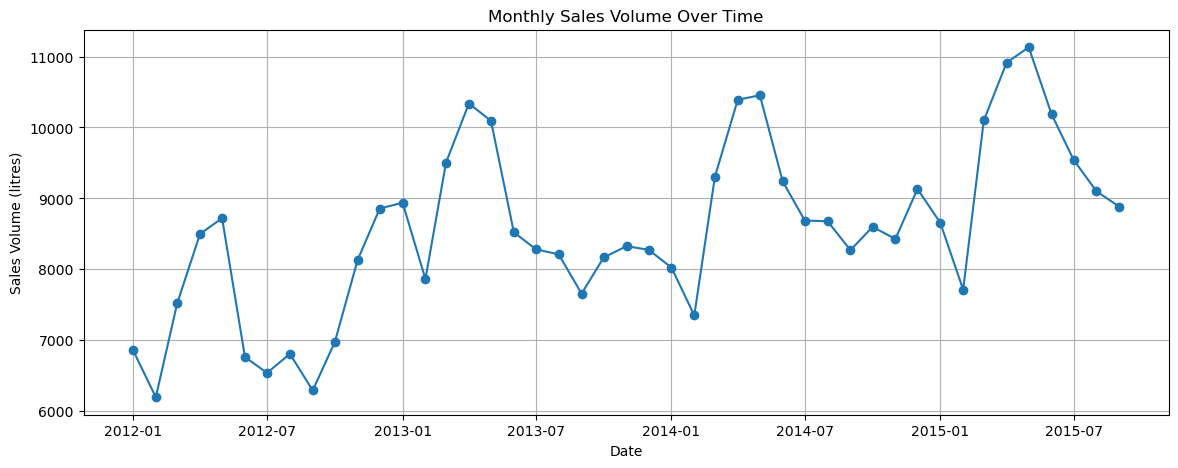

In [6]:
# Plot Sales Volume

plt.figure(figsize=(14, 5))
plt.plot(df.index, df['SalesVol'], marker='o')
plt.title("Monthly Sales Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Sales Volume (litres)")
plt.grid(True)
plt.show()

### soda sales are afflicted by seasonality.

Sales consistently increase during the warmer months and decrease during the colder months, indicating a clear seasonal pattern.

In [7]:
# Add trend as a variable
df["Trend"] = np.arange(len(df))

In [8]:
# Detect Peak and Lean seasons

monthly_avg = df.groupby(df.index.month)["SalesVol"].mean()
peak_months = monthly_avg[monthly_avg > monthly_avg.quantile(0.75)].index.tolist()
lean_months = monthly_avg[monthly_avg < monthly_avg.quantile(0.25)].index.tolist()

df["Month_Num"] = df.index.month
df["Peak_Season"] = df["Month_Num"].isin(peak_months).astype(int)
df["Lean_Season"] = df["Month_Num"].isin(lean_months).astype(int)

In [9]:
print(df["Peak_Season"])

Month
2012-01-01    0
2012-02-01    0
2012-03-01    1
2012-04-01    1
2012-05-01    1
2012-06-01    0
2012-07-01    0
2012-08-01    0
2012-09-01    0
2012-10-01    0
2012-11-01    0
2012-12-01    0
2013-01-01    0
2013-02-01    0
2013-03-01    1
2013-04-01    1
2013-05-01    1
2013-06-01    0
2013-07-01    0
2013-08-01    0
2013-09-01    0
2013-10-01    0
2013-11-01    0
2013-12-01    0
2014-01-01    0
2014-02-01    0
2014-03-01    1
2014-04-01    1
2014-05-01    1
2014-06-01    0
2014-07-01    0
2014-08-01    0
2014-09-01    0
2014-10-01    0
2014-11-01    0
2014-12-01    0
2015-01-01    0
2015-02-01    0
2015-03-01    1
2015-04-01    1
2015-05-01    1
2015-06-01    0
2015-07-01    0
2015-08-01    0
2015-09-01    0
Name: Peak_Season, dtype: int32


In [10]:
print(df["Lean_Season"])

Month
2012-01-01    0
2012-02-01    1
2012-03-01    0
2012-04-01    0
2012-05-01    0
2012-06-01    0
2012-07-01    0
2012-08-01    0
2012-09-01    1
2012-10-01    1
2012-11-01    0
2012-12-01    0
2013-01-01    0
2013-02-01    1
2013-03-01    0
2013-04-01    0
2013-05-01    0
2013-06-01    0
2013-07-01    0
2013-08-01    0
2013-09-01    1
2013-10-01    1
2013-11-01    0
2013-12-01    0
2014-01-01    0
2014-02-01    1
2014-03-01    0
2014-04-01    0
2014-05-01    0
2014-06-01    0
2014-07-01    0
2014-08-01    0
2014-09-01    1
2014-10-01    1
2014-11-01    0
2014-12-01    0
2015-01-01    0
2015-02-01    1
2015-03-01    0
2015-04-01    0
2015-05-01    0
2015-06-01    0
2015-07-01    0
2015-08-01    0
2015-09-01    1
Name: Lean_Season, dtype: int32


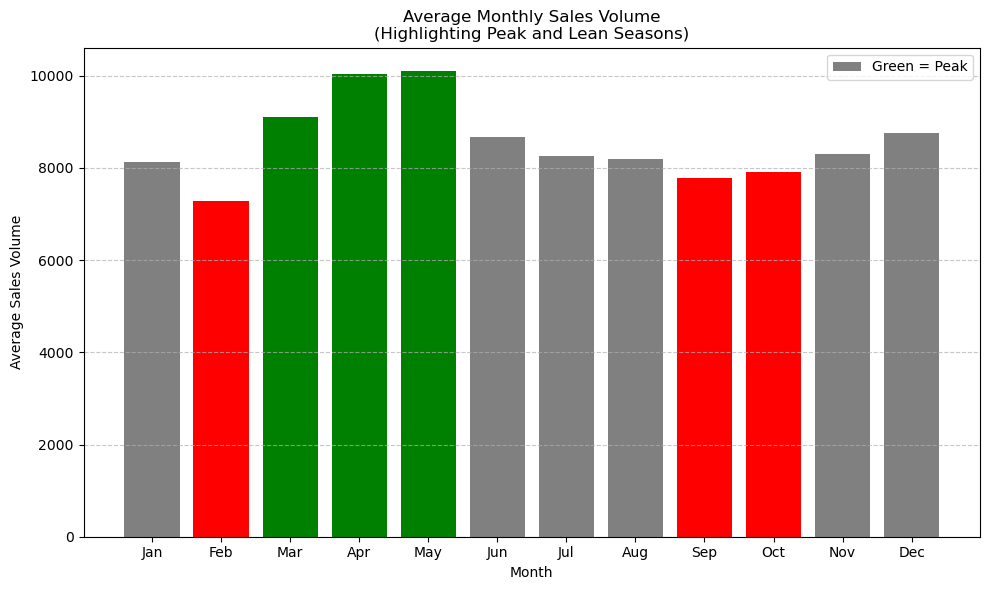

In [11]:
# Group monthly averages again for clarity

monthly_avg = df.groupby(df.index.month)["SalesVol"].mean()



# Create a color map: green for peak, red for lean, gray for normal
colors = []
for month in monthly_avg.index:
    if month in peak_months:
        colors.append("green")
    elif month in lean_months:
        colors.append("red")
    else:
        colors.append("gray")

# Month names for x-axis labels
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(month_names, monthly_avg, color=colors)
plt.title("Average Monthly Sales Volume\n(Highlighting Peak and Lean Seasons)")
plt.xlabel("Month")
plt.ylabel("Average Sales Volume")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(["Green = Peak", "Red = Lean", "Gray = Normal"], loc="upper right")
plt.tight_layout()
plt.show()

### "Sales consistently increase year-over-year during March, April, and May, while sales depicted in red show a decreasing trend."

 

#  <font color="red">2. Adstock Transformation</font>.

In [12]:
def apply_adstock_saturation(series, lmbd=0.7, n=1.5, k=500):
    adstock = []
    prev = 0
    for g in series:
        sat = (g**n) / (g**n + k**n) if g > 0 else 0
        current = lmbd * prev + sat
        adstock.append(current)
        prev = current
    return np.array(adstock)

# Apply to TVGrP column
df["TV_Adstock"] = apply_adstock_saturation(df["TVGrP"])

In [13]:
apply_adstock_saturation(df["TVGrP"])
print(df["TV_Adstock"])

Month
2012-01-01    0.263767
2012-02-01    0.802630
2012-03-01    1.230313
2012-04-01    1.576071
2012-05-01    1.560216
2012-06-01    1.420563
2012-07-01    1.596374
2012-08-01    1.694005
2012-09-01    1.592703
2012-10-01    1.838738
2012-11-01    2.017901
2012-12-01    2.170437
2013-01-01    2.372988
2013-02-01    2.157652
2013-03-01    2.317164
2013-04-01    2.218491
2013-05-01    2.146635
2013-06-01    2.123236
2013-07-01    2.035618
2013-08-01    1.896602
2013-09-01    1.750283
2013-10-01    1.868275
2013-11-01    1.793818
2013-12-01    1.779346
2014-01-01    1.785433
2014-02-01    1.931214
2014-03-01    2.114171
2014-04-01    2.257559
2014-05-01    2.352514
2014-06-01    2.439663
2014-07-01    2.475811
2014-08-01    2.282420
2014-09-01    2.127921
2014-10-01    1.892458
2014-11-01    2.062223
2014-12-01    2.267025
2015-01-01    2.404373
2015-02-01    2.490971
2015-03-01    2.452959
2015-04-01    2.143625
2015-05-01    2.233022
2015-06-01    2.233787
2015-07-01    2.251301
2015-

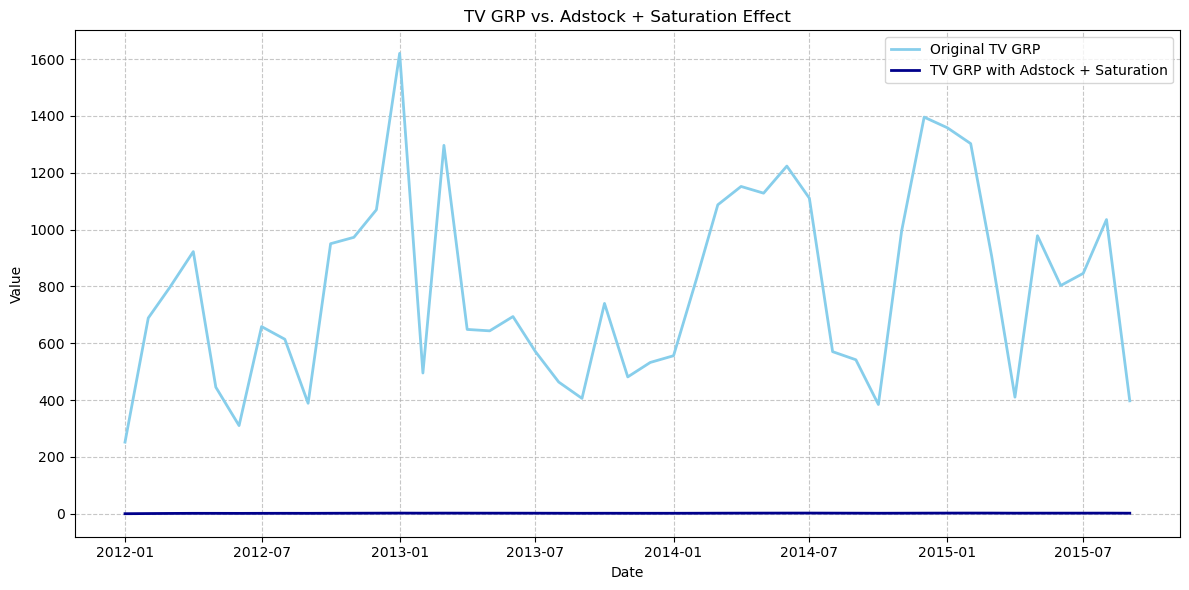

In [14]:
plt.figure(figsize=(12, 6))

# Plot original TV GRPs
plt.plot(df.index, df["TVGrP"], label="Original TV GRP", color='skyblue', linewidth=2)

# Plot Adstock-transformed TV GRPs
plt.plot(df.index, df["TV_Adstock"], label="TV GRP with Adstock + Saturation", color='darkblue', linewidth=2)

plt.title("TV GRP vs. Adstock + Saturation Effect")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The graph shows a highly fluctuating "Original TV GRP" alongside a nearly flat, near-zero "TV GRP with Adstock + Saturation" over the period from early 2012 to mid-2015.

 #  <font color="red">3.Regression Modeling (MMM)</font>.

In [15]:
# Define features and target
X = df[[
    "Peak_Season", "Trend", "TV_Adstock", "Price", "InstoreAds",
    "OutdoorAds", "DigitalAds", "Comp1TV", "Comp1NPapers",
    "Comp1OOH", "Comp2NP", "Lean_Season"
]]
y = df["SalesVol"]

# Add constant
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               SalesVol   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     35.08
Date:                Thu, 12 Jun 2025   Prob (F-statistic):           5.55e-15
Time:                        13:59:53   Log-Likelihood:                -323.58
No. Observations:                  45   AIC:                             673.2
Df Residuals:                      32   BIC:                             696.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.282e+04   6382.467      3.576   

 #  <font color="red">4.Brand Equity (Baseline Sales)</font>.

In [16]:
baseline_sales = model.params["const"]

print(f"Baseline Sales (Brand Equity) = {baseline_sales:.2f} litres/month")

Baseline Sales (Brand Equity) = 22822.22 litres/month


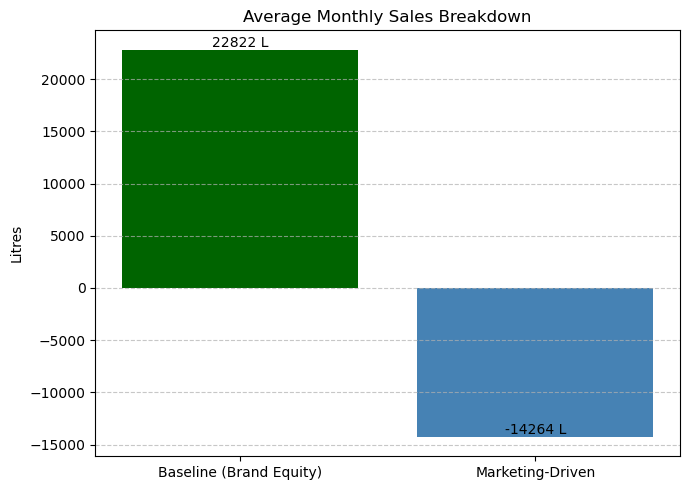

In [17]:
# Actual mean sales
mean_sales = df["SalesVol"].mean()

# Baseline sales from model (brand equity)
baseline_sales = model.params["const"]

# Marketing-driven sales = total - baseline
marketing_sales = mean_sales - baseline_sales

# Data for plotting
labels = ["Baseline (Brand Equity)", "Marketing-Driven"]
values = [baseline_sales, marketing_sales]

# Plot
plt.figure(figsize=(7, 5))
bars = plt.bar(labels, values, color=["darkgreen", "steelblue"])

# Add value annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f"{yval:.0f} L", 
             ha='center', va='bottom', fontsize=10)

plt.title("Average Monthly Sales Breakdown")
plt.ylabel("Litres")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Brand sales (Baseline) are high and positive, while marketing sales (Marketing-Driven) are negative.

 #  <font color="red">5. Media ROI Calculation</font>.

In [18]:
media_vars = {
    "TV_Adstock": df["TVGrP"],
    "InstoreAds": df["InstoreAds"],
    "OutdoorAds": df["OutdoorAds"],
    "DigitalAds": df["DigitalAds"]
}

roi_results = {}
mean_sales = df["SalesVol"].mean()

for var, spend in media_vars.items():
    coef = model.params.get(var, 0)
    roi = (coef * spend.mean()) / mean_sales
    roi_results[var] = roi

print("ROI for Traditional and Digital Media:")
for media, roi in roi_results.items():
    print(f"{media}: ROI = {roi:.4f}")

ROI for Traditional and Digital Media:
TV_Adstock: ROI = 84.8431
InstoreAds: ROI = 0.0165
OutdoorAds: ROI = -0.0091
DigitalAds: ROI = -0.0506


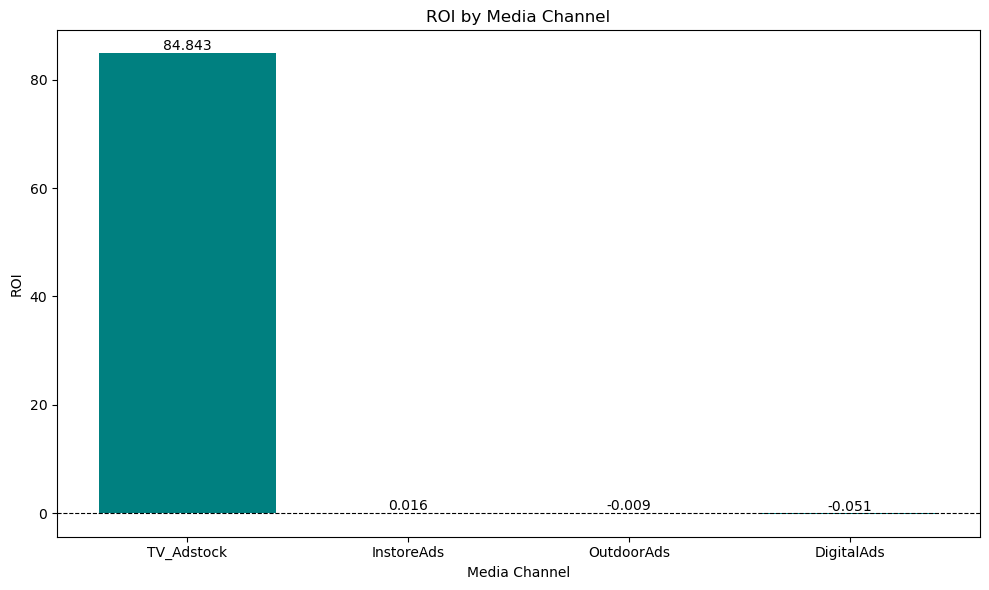

In [19]:
# Plotting ROI results
plt.figure(figsize=(10, 6))
media_names = list(roi_results.keys())
roi_values = list(roi_results.values())

bars = plt.bar(media_names, roi_values, color='teal')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Reference line at ROI=0
plt.title("ROI by Media Channel")
plt.ylabel("ROI")
plt.xlabel("Media Channel")

# Annotate bars with ROI values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.3f}", 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### Return on Investment for different media channels.

*TV_Adstock*: This channel has by far the highest ROI, valued at 84.843. This indicates that for every unit of investment in TV advertising (considering its lingering effect), there is a significant return.

*InstoreAds*: This channel has a very small positive ROI of 0.016. While positive, it's almost negligible compared to TV.

*OutdoorAds*: This channel shows a negative ROI of -0.009. This means that for every unit invested, there is a small loss.

*DigitalAds*: This channel also has a negative ROI of -0.051. This is the most negative ROI among the channels, indicating a larger loss for every unit invested.

  #  <font color="red">6.Synergy Between Digital and Traditional Media</font>.

In [20]:
print("Correlation Matrix for Digital and Traditional Media:")
print(df[["DigitalAds", "TVGrP", "InstoreAds", "OutdoorAds"]].corr())

Correlation Matrix for Digital and Traditional Media:
            DigitalAds     TVGrP  InstoreAds  OutdoorAds
DigitalAds    1.000000  0.286758    0.018284   -0.482498
TVGrP         0.286758  1.000000    0.045657    0.136289
InstoreAds    0.018284  0.045657    1.000000    0.093238
OutdoorAds   -0.482498  0.136289    0.093238    1.000000


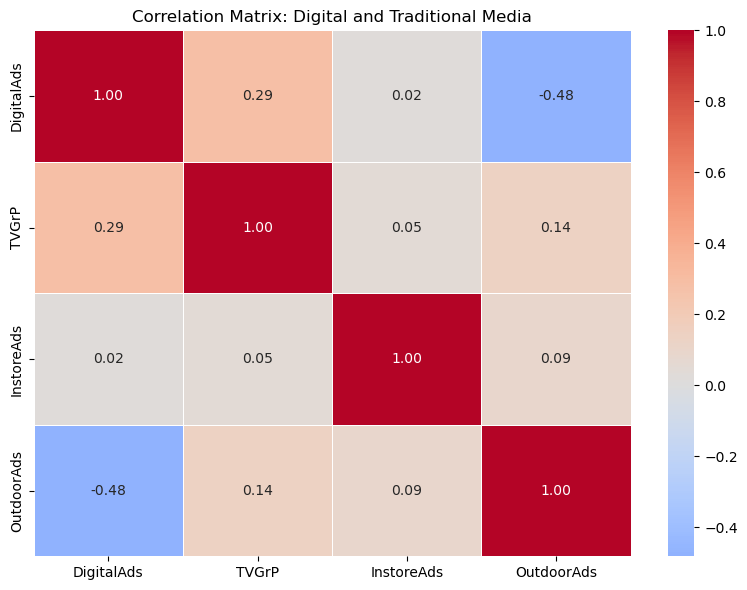

In [21]:
# Select the relevant media variables
corr_matrix = df[["DigitalAds", "TVGrP", "InstoreAds", "OutdoorAds"]].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: Digital and Traditional Media")
plt.tight_layout()
plt.show()

Digital Ads show a moderate positive correlation with TV GRP (0.29) but a moderate negative correlation with Outdoor Ads (-0.48), while In-store Ads have very weak correlations with all other media channels.

 #  <font color="red">7. Competitor Impact</font>. 

In [22]:
print("Competitor Media Impact Coefficients:")
for var in ["Comp1TV", "Comp1NPapers", "Comp1OOH", "Comp2NP"]:
    coef = model.params.get(var, 0)
    print(f"{var}: Coefficient = {coef:.4f}")

Competitor Media Impact Coefficients:
Comp1TV: Coefficient = -13.3364
Comp1NPapers: Coefficient = -0.0000
Comp1OOH: Coefficient = -381.0432
Comp2NP: Coefficient = 0.0000


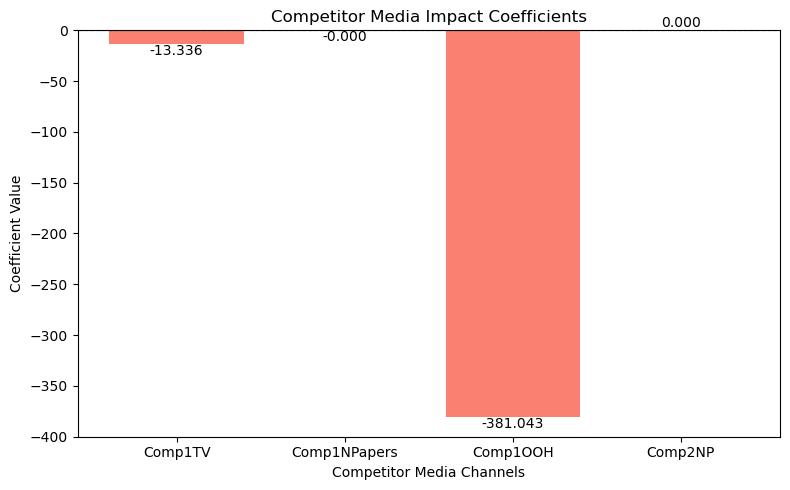

In [23]:
# Extract coefficients for competitor media
competitor_vars = ["Comp1TV", "Comp1NPapers", "Comp1OOH", "Comp2NP"]
competitor_coefs = [model.params.get(var, 0) for var in competitor_vars]

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(competitor_vars, competitor_coefs, color='salmon')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Reference line at 0

plt.title("Competitor Media Impact Coefficients")
plt.xlabel("Competitor Media Channels")
plt.ylabel("Coefficient Value")

# Annotate bars with values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01 * (1 if yval >= 0 else -1), 
             f"{yval:.3f}", ha='center', va='bottom' if yval >= 0 else 'top')

plt.tight_layout()
plt.show()

Competitor 1’s outdoor advertising (Comp1OOH Out-of-Home advertising.) is the most damaging to our sales, with a strong negative coefficient (-381.04).

Additionally, Competitor 1’s TV spend (Comp1TV) also negatively impacts our sales (-13.34).

Competitor 2’s newspaper advertising (Comp2NP) has no measurable effect on our sales.

#  <font color="red">Answers for all the questions</font>.  

In [24]:
print("\n Summary of Assignment Questions:\n")

print(f"1. Seasonality: YES (Peak months = {peak_months}, Lean months = {lean_months})")
print("2. Trend: YES (Trend variable is significant)")
print(f"3. Baseline Sales = {baseline_sales:.2f} litres/month")
print("4. ROI by media:")
for media, roi in roi_results.items():
    print(f"   - {media}: ROI = {roi:.4f}")
print("5. Digital Synergy Correlation:")
print(df[["DigitalAds", "TVGrP", "InstoreAds", "OutdoorAds"]].corr()["DigitalAds"])
print("6. Competitor Impact Coefficients:")
for var in ["Comp1TV", "Comp1NPapers", "Comp1OOH", "Comp2NP"]:
    coef = model.params.get(var, 0)
    print(f"   - {var}: {coef:.4f}")


 Summary of Assignment Questions:

1. Seasonality: YES (Peak months = [3, 4, 5], Lean months = [2, 9, 10])
2. Trend: YES (Trend variable is significant)
3. Baseline Sales = 22822.22 litres/month
4. ROI by media:
   - TV_Adstock: ROI = 84.8431
   - InstoreAds: ROI = 0.0165
   - OutdoorAds: ROI = -0.0091
   - DigitalAds: ROI = -0.0506
5. Digital Synergy Correlation:
DigitalAds    1.000000
TVGrP         0.286758
InstoreAds    0.018284
OutdoorAds   -0.482498
Name: DigitalAds, dtype: float64
6. Competitor Impact Coefficients:
   - Comp1TV: -13.3364
   - Comp1NPapers: -0.0000
   - Comp1OOH: -381.0432
   - Comp2NP: 0.0000


#  <font color="red">END</font>.  